<a href="https://colab.research.google.com/github/ushabolimera/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Capstone_Project(_Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Random Forest Hyperparameter Tuning

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [ ]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#importing model 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#reading data
df2 = pd.read_csv("/content/drive/MyDrive/Rossmann Sales Prediction/Cleaned Data/Cleaned_data.csv",parse_dates=['Date'])
comparisons_df = pd.read_csv("/content/drive/MyDrive/Rossmann Sales Prediction/Cleaned Data/results.csv")

In [ ]:
#setting date and store as index
df2.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df2.sort_index(inplace=True)

In [ ]:
df2.head()

Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                  
2013-01-01 85      0.083785      0             1              1   
           259     0.195452      0             1              1   
           262     0.389145      0             1              1   
           274     0.098674      0             1              1   
           335     0.065241      0             1              1   

                  CompetitionDistance  Promo2  Year  Month  WeekOfYear  \
Date       Store                                                         
2013-01-01 85                0.024393       0   0.0    0.0         0.0   
           259               0.002505       0   0.0    0.0         0.0   
           262               0.015295       0   0.0    0.0         0.0   
           274               0.047732       1   0.0    0.0         0.0   
           335               0.000923       1   0.0    0.0         0.0   

                  DayOfYear  ...  DayOfWeek_6  DayOfWeek_7  StoreType_a  \
Date       Store             ...                                          
2013-01-01 85           0.0  ...          0.0          0.0          0.0   
           259          0.0  ...          0.0          0.0          0.0   
           262          0.0  ...          0.0          0.0          0.0   
           274          0.0  ...          0.0          0.0          0.0   
           335          0.0  ...          0.0          0.0          0.0   

                  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
Date       Store                                                        
2013-01-01 85             1.0          0.0          0.0           1.0   
           259            1.0          0.0          0.0           0.0   
           262            1.0          0.0          0.0           1.0   
           274            1.0          0.0          0.0           0.0   
           335            1.0          0.0          0.0           1.0   

                  Assortment_b  Assortment_c     Sales  
Date       Store                                        
2013-01-01 85              0.0           0.0  0.101562  
           259             1.0           0.0  0.164882  
           262             0.0           0.0  0.415562  
           274             1.0           0.0  0.074655  
           335             0.0           0.0  0.057784  

[5 rows x 28 columns]

In [ ]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [ ]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798498, 27)
The shape of y_train is: (798498, 1)
The shape of X_test is: (45852, 27)
The shape of y_test is: (45852, 1)


In [ ]:
# Create model
rf_tuned = RandomForestRegressor()

In [ ]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 7.2min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 7.2min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 6.9min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 8.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 8.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 8.3min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [ ]:
#best para
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#save the best parameters
random_t = rf_random.best_estimator_

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [ ]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualize'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

  #printing test results
  print(f'The MAE for the validation set is {MAE_test}')
  print(f'The MSE for the validation set is {MSE_test}')
  print(f'The RMSE for the validation set is {RMSE_test}')
  print(f'The R2 for the validation set is {R2_test}')
  print(f'The Adjusted R2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparisons_df = pd.DataFrame(final_list, columns= comparison_columns)

The MAE for the validation set is 0.010326
The MSE for the validation set is 0.000243
The RMSE for the validation set is 0.0156
The R2 for the validation set is 0.955971
The Adjusted R2 for the validation set is 0.955945


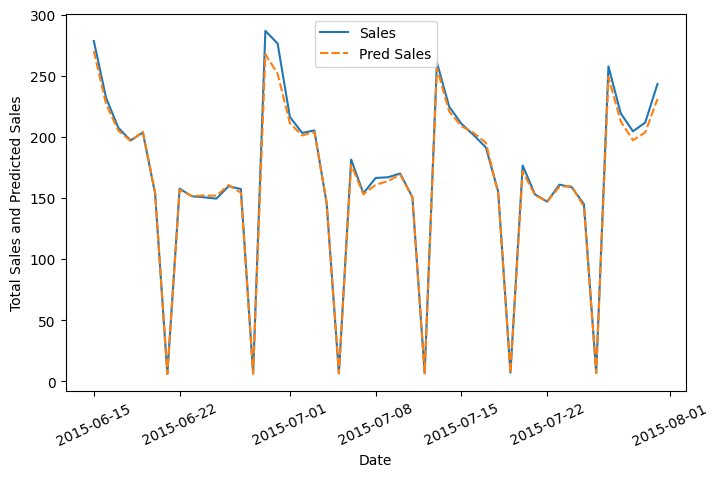

In [ ]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

In [ ]:
comparisons_df = comparisons_df.append(random_tuned)

In [ ]:
comparisons_df.drop('Unnamed: 0',axis=1,inplace=True)
comparisons_df


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022316,0.000933,0.030543,0.832881,0.832876,0.023140,0.001034,0.032160,0.812882,0.812772
1,Decision Tree Regressor,0.000000,0.000000,0.000047,1.000000,1.000000,0.014203,0.000466,0.021580,0.915750,0.915700
2,Random Forest Regressor,0.003097,0.000023,0.004764,0.995934,0.995934,0.010375,0.000247,0.015705,0.955376,0.955350
0,Random Forest Tuned,0.003041,0.000021,0.004636,0.996150,0.996150,0.010326,0.000243,0.015600,0.955971,0.955945


####Feature Importance

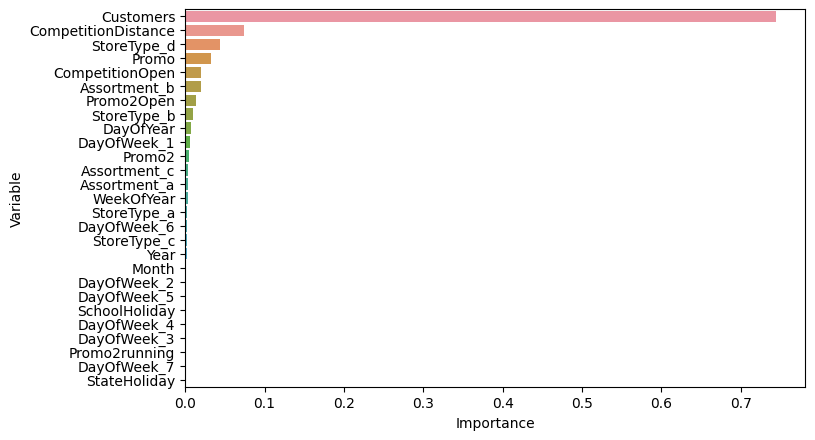

In [ ]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

##Model Performance and Evaluation

In [ ]:
comparisons_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022316,0.000933,0.030543,0.832881,0.832876,0.023140,0.001034,0.032160,0.812882,0.812772
1,Decision Tree Regressor,0.000000,0.000000,0.000047,1.000000,1.000000,0.014203,0.000466,0.021580,0.915750,0.915700
2,Random Forest Regressor,0.003097,0.000023,0.004764,0.995934,0.995934,0.010375,0.000247,0.015705,0.955376,0.955350
0,Random Forest Tuned,0.003041,0.000021,0.004636,0.996150,0.996150,0.010326,0.000243,0.015600,0.955971,0.955945


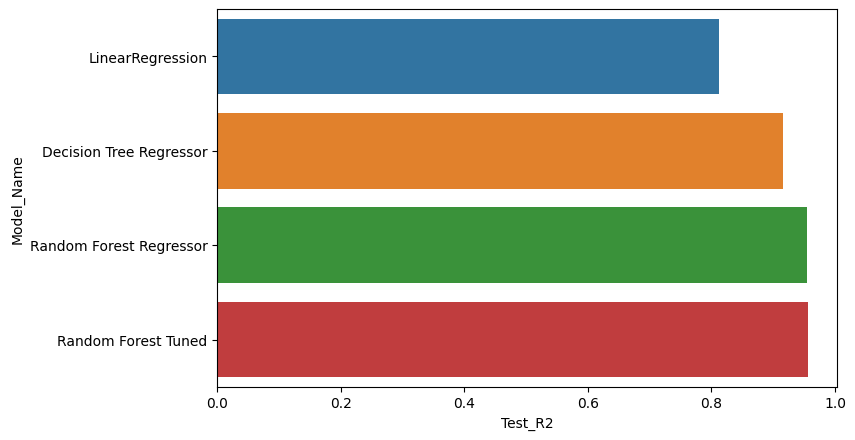

In [ ]:
#visualising our comparison df for Test R2
sns.barplot(y=comparisons_df['Model_Name'], x = comparisons_df['Test_R2'])

In [ ]:
#test values
lr_r2=0.812882
dt_r2 = 0.915750
random_r2 = 0.955376
r_tuned_r2 = 0.955971

**Decision Tree vs Linear Regression**

In [ ]:
#improvement % 
improvement_r = ((dt_r2 - lr_r2)/lr_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Decision Tree against Linear Regression.')

Model Performance
Improvement of 12.655 % was seen in Decision Tree against Linear Regression.


**Decision Tree vs Random Forest**

In [ ]:
#improvement % 
improvement_r = ((random_r2 - dt_r2)/dt_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 4.327 % was seen in Random Forest against Decision Tree.


####Random Forest Tuned vs Decision Tree and Random Forest Models

In [ ]:
#improvement % of tuned vs decision tree

improvement_r = ((r_tuned_r2 - dt_r2)/dt_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 4.392 % was seen in Random Forest Tuned against Decision Tree.


In [ ]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.062 % was seen in Random Forest Tuned against Simple Random Forest.


Observation

* The maximum R^2 was seen in tuned Random Forest model with the value 0.955971 which was only 0.062% improved from a simple random forest model. 
* It seems like we have maxed out on performance with the data and these models.

###Store wise Sales Predictions

In [ ]:
#predictions 
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [ ]:
#head
six_weeks_sales_df.head()

Sales  Pred_Sales
Date       Store                      
2015-06-15 1      0.132801    0.129717
           2      0.195086    0.197675
           3      0.260355    0.270668
           4      0.298380    0.281284
           5      0.187914    0.179656

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data

cleaned_unscaled_data= pd.read_csv("/content/drive/MyDrive/Rossmann Sales Prediction/Cleaned Data/Cleaned_Unscaled_data.csv")
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

MinMaxScaler()

In [ ]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [ ]:
#sales vs predictions
six_weeks_sales_df.head()

Sales  Pred_Sales
Date       Store                     
2015-06-15 1       5518.0     5389.88
           2       8106.0     8213.58
           3      10818.0    11246.53
           4      12398.0    11687.64
           5       7808.0     7464.87

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]

Sales         7808.00
Pred_Sales    7464.87
Name: (2015-06-15 00:00:00, 5), dtype: float64

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]

Sales         8400.00
Pred_Sales    7692.78
Name: (2015-07-28 00:00:00, 56), dtype: float64

###Conclusion and Recommendations
**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.
